In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [34]:
conn = sqlite3.connect("process.db")
df = pd.read_sql_query("select * from COUNTERS_DOUBLE_TIME_DATA;", conn)
df.sample(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
311,2020-11-07 02:43:31.412,19,0.00000,9644
328,2020-11-07 02:43:31.498,18,0.00000,1988
505,2020-11-07 02:43:31.671,19,0.59375,24224
510,2020-11-07 02:43:31.672,18,0.00000,17776
157,2020-11-07 02:43:31.281,19,0.00000,12080
366,2020-11-07 02:43:31.539,18,0.00000,7432
435,2020-11-07 02:43:31.615,19,0.00000,19272
532,2020-11-07 02:43:31.675,18,0.00000,27700
207,2020-11-07 02:43:31.305,19,2.18750,5064
128,2020-11-07 02:43:31.255,18,0.00000,3492


<BarContainer object of 574 artists>

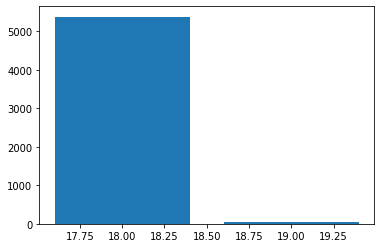

In [8]:
plt.bar(df['ID_INPUT'],df['VALUE'])
#input id 18 has value, input id 19 is always 0

5378.65625


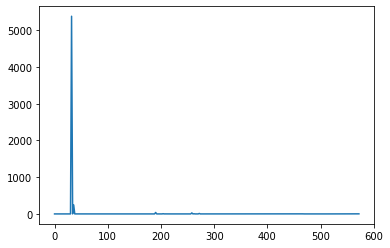

In [13]:
id18 = df.loc[df["ID_INPUT"] == 18]
plt.plot(id18["VALUE"])
print(np.max(id18["VALUE"]))
#the values with id 18 is mostly around 0 but the max is around 5000

In [23]:
deviceconn = sqlite3.connect("device.db")
dev_string_df = pd.read_sql_query("select * from COUNTERS_STRING_TIME_DATA;", deviceconn)
dev_ull_df = pd.read_sql_query("select * from COUNTERS_ULL_TIME_DATA;", deviceconn)

In [48]:
dev_string_df.sample(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
77,2020-11-07 02:14:51.590,2,HID Keyboard Device,26
29,2020-11-07 02:14:51.590,2,,10
54,2020-11-07 02:14:51.590,0,GUID_DEVINTERFACE_HID,19
140,2020-11-07 02:14:51.590,2,WDC WDS100T2B0A-00SM50,47
121,2020-11-07 02:14:51.590,1,ms_l2tpminiport,41
110,2020-11-07 02:14:51.590,2,WAN Miniport (IP),37
51,2020-11-07 02:14:51.590,0,GUID_DEVINTERFACE_HID,18
165,2020-11-07 02:14:51.590,0,GUID_DEVINTERFACE_USB_DEVICE,56
155,2020-11-07 02:14:51.590,2,,52
56,2020-11-07 02:14:51.590,2,HID Keyboard Device,19


In [25]:
dev_ull_df.sample(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
19,2020-11-07 02:14:51.590,3,4,20
18,2020-11-07 02:14:51.590,3,4,19
47,2020-11-07 02:14:51.590,3,4,48
6,2020-11-07 02:14:51.590,3,4,7
27,2020-11-07 02:14:51.590,3,4,28
8,2020-11-07 02:14:51.590,3,4,9
13,2020-11-07 02:14:51.590,3,4,14
52,2020-11-07 02:14:51.590,3,4,53
30,2020-11-07 02:14:51.590,3,4,31
36,2020-11-07 02:14:51.590,3,4,37


In [32]:
counts = dev_string_df.groupby(dev_string_df['VALUE']).agg('count')#.apply(lambda x: np.count(x))
counts
# There are 78 differnt device input

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA
VALUE,,,
,22,22,22
ACPI\VEN_PNP&DEV_0501,3,3,3
Broadcom BCM20702 Bluetooth 4.0 USB Device,1,1,1
CT500MX500SSD1,1,1,1
GUID_DEVINTERFACE_COMPORT,1,1,1
GUID_DEVINTERFACE_DISK,2,2,2
GUID_DEVINTERFACE_DISPLAY_ADAPTER,2,2,2
GUID_DEVINTERFACE_HID,18,18,18
GUID_DEVINTERFACE_KEYBOARD,4,4,4


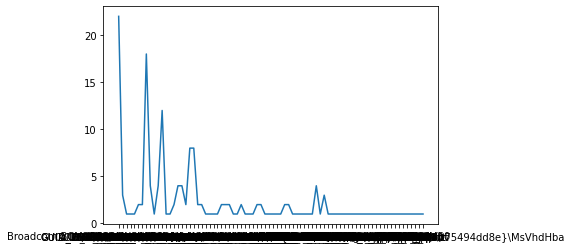

In [33]:
plt.plot(counts['ID_INPUT'])

In [45]:
batconn = sqlite3.connect("battery.db")
batdf = pd.read_sql_query("select * from INPUTS;", batconn)

In [46]:
batdf
#The inputs for battery

,ID_INPUT,ID_INPUT_LIBRARY,ID_BLOB_INPUT,INDEX_IN_BLOB,INPUT_NAME,INPUT_DESCRIPTION,INPUT_TYPE,INPUT_CATALOG_TIME_UTC,GUID
0,0,0,0,0,ACPI-BATTERY(0),ACPI-BATTERY:::AC_DC::,1,2020-11-07 02:09:26.785,02697fb9-7557-4e7d-b005-bd7121913652
1,1,0,0,0,ACPI-BATTERY(1),ACPI-BATTERY:::BATTERY_COUNT::,1,2020-11-07 02:09:26.785,0945b713-bd24-4672-b130-96ac7a4a7eff


In [50]:
userconn = sqlite3.connect("user wait.db")
userdf = pd.read_sql_query("select * from COUNTERS_STRING_TIME_DATA;", userconn)
userdf.sample(10)

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
16,2020-11-07 02:29:52.186,0,OTHER,0
15,2020-11-07 02:29:51.986,0,INVISIBLE,0
18,2020-11-07 02:29:52.686,0,OTHER,0
13,2020-11-07 02:29:50.786,0,INVISIBLE,0
0,2020-11-07 02:29:41.187,0,OTHER,0
4,2020-11-07 02:29:47.686,0,OTHER,0
28,2020-11-07 02:31:53.686,0,OTHER,0
21,2020-11-07 02:29:58.186,0,INVISIBLE,0
17,2020-11-07 02:29:52.586,0,INVISIBLE,0
12,2020-11-07 02:29:50.686,0,OTHER,0


In [51]:
userdf.groupby('VALUE').agg('count')

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA
VALUE,,,
INVISIBLE,14,14,14
OTHER,15,15,15
